In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The above data has 33 columns with 1 target column used for classification as 'Malignant' or 'Benign'.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

The column 'unnamed: 32' contains null values.we can delete this column. 

In [4]:
data.drop(['Unnamed: 32'],inplace=True,axis=1)

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Data preprocessing

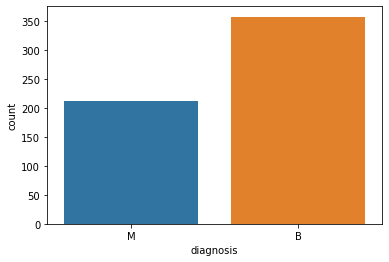

In [7]:
#plots of different columns
sns.countplot(x='diagnosis',data=data);

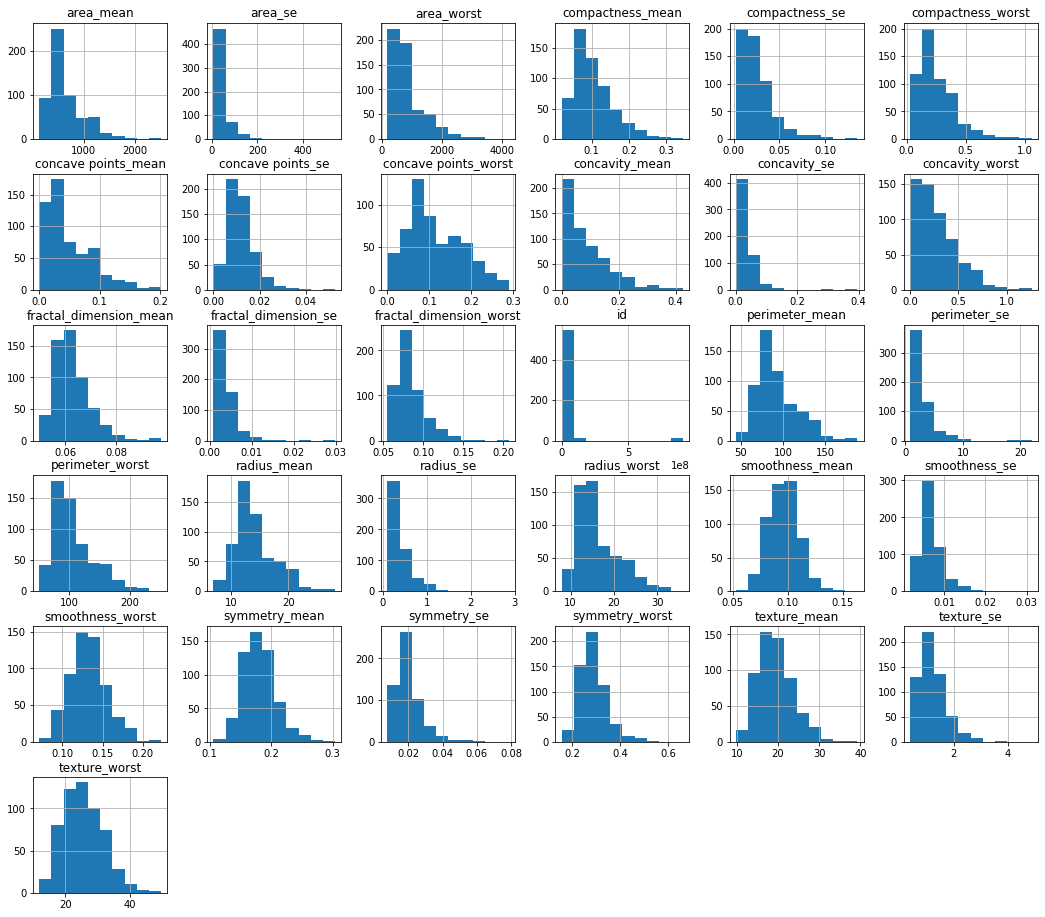

In [8]:
#hist of all numerical columns
data.hist(figsize=(18,16));

A lot of columns in the data are right skewed.We should **log transform** all the columns to remove the skewness.

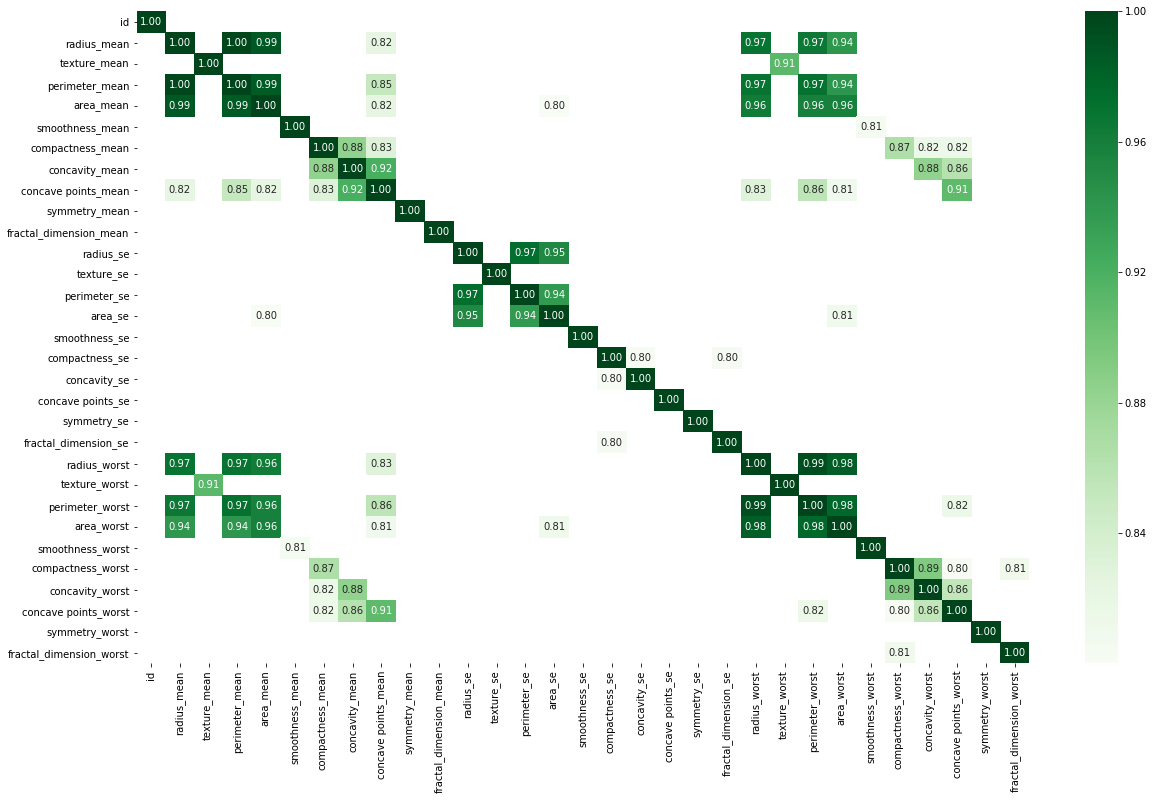

In [9]:
#correlations between columns
corr=data.corr()
plt.figure(figsize=(20,12))
kot=corr[corr>=0.8]
sns.heatmap(kot,annot=True,fmt='.2f',cmap='Greens')

From the above correlations:
<li>radius_mean,perimeter_mean,concave points_mean,area_mean,radius_worst,perimeter_worst,area_worst are highly correlated</li>
<li>texture_mean,texture_worst</li>
<li>smoothness_mean,smoothness_worst</li>
<li>compactness_mean,concavity_mean,compactness_worst,concavity_worst,concave points_worst</li>
<li>radius_se,perimeter_se,area_se</li>
<li>compactness_se,fractal_dimension_se,concavity_se</li>

## Feature engineering

Log transform for all columns to remove skewness and to make data normal.

In [10]:
for col in data.columns[2:]:
    data[col]=np.log1p(data[col])
    print(col,' log transform is done !')

radius_mean  log transform is done !
texture_mean  log transform is done !
perimeter_mean  log transform is done !
area_mean  log transform is done !
smoothness_mean  log transform is done !
compactness_mean  log transform is done !
concavity_mean  log transform is done !
concave points_mean  log transform is done !
symmetry_mean  log transform is done !
fractal_dimension_mean  log transform is done !
radius_se  log transform is done !
texture_se  log transform is done !
perimeter_se  log transform is done !
area_se  log transform is done !
smoothness_se  log transform is done !
compactness_se  log transform is done !
concavity_se  log transform is done !
concave points_se  log transform is done !
symmetry_se  log transform is done !
fractal_dimension_se  log transform is done !
radius_worst  log transform is done !
texture_worst  log transform is done !
perimeter_worst  log transform is done !
area_worst  log transform is done !
smoothness_worst  log transform is done !
compactness_wo

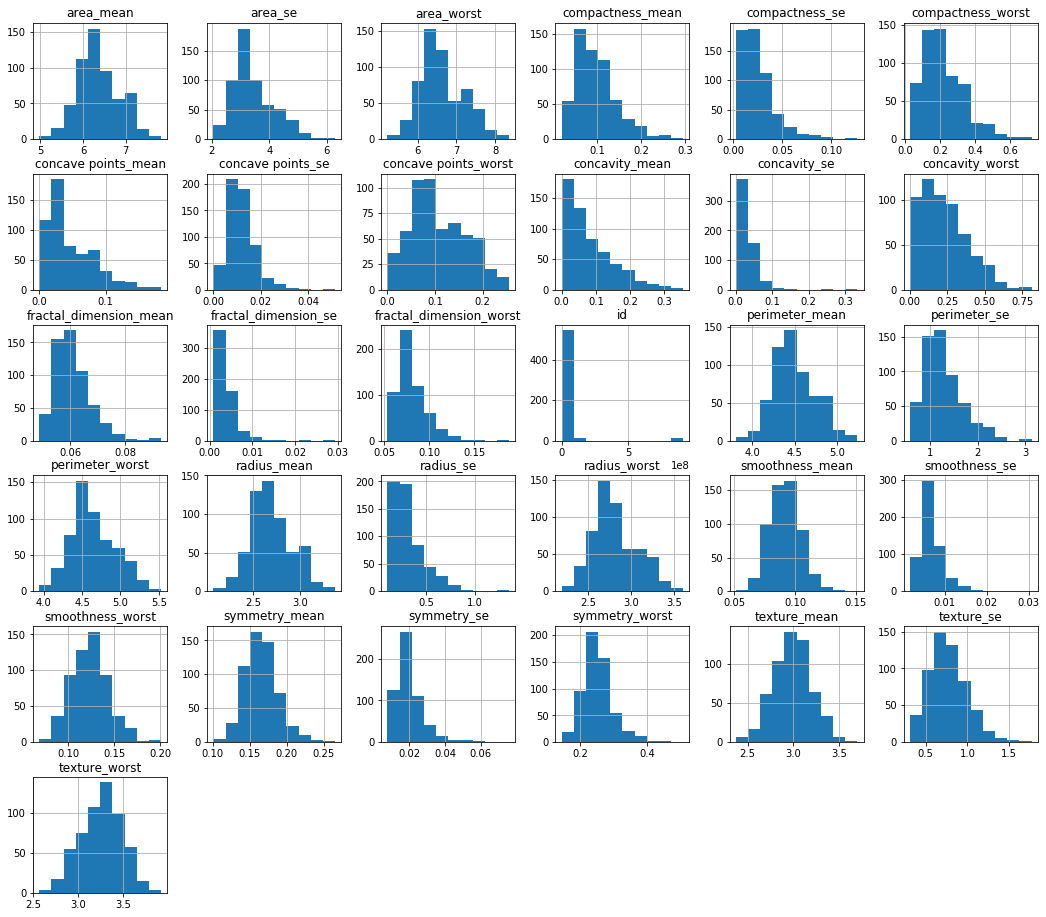

In [11]:
data.hist(figsize=(18,16));

## Feature selection

We will select columns whose correlation is less than 0.8

In [16]:
selected_columns=['radius_mean',
                  'texture_mean',
                  'smoothness_mean',
                  'compactness_mean',
                  'symmetry_mean',
                  'fractal_dimension_mean',
                  'radius_se', 
                  'texture_se',
                  'smoothness_se',
                  'compactness_se',
                  'concave points_se',
                  'symmetry_se',
                  'texture_worst',
                  'smoothness_worst',
                  'symmetry_worst', 
                  'fractal_dimension_worst']

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['diagnosis']=le.fit_transform(data['diagnosis'])

In [20]:
X=data[selected_columns]
y=data['diagnosis']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [23]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((398, 16), (398,), (171, 16), (171,))

In [24]:
models=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GaussianNB()]


In [27]:
for model in models:
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(model)
    print('\nTraining score ',model.score(X_train,y_train))
    print('Accuracy score ',accuracy_score(preds,y_test))
    print('classification report \n',confusion_matrix(preds,y_test))
    print('---------------------------------------------------')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Training score  0.8618090452261307
Accuracy score  0.8304093567251462
classification report 
 [[103  29]
 [  0  39]]
---------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Training score  0.9045226130653267
Accuracy score  0.8830409356725146
classification report 
 [[102  19]
 [  1  49]]
---------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                 

/Users/shivaganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shivaganesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Gridsearch for SVC model

In [29]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters={'kernel':['linear','rbf','poly']}
clf=SVC()
clf_best=GridSearchCV(clf,param_grid=parameters,cv=5,n_jobs=-1)
clf_best.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
clf_best.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
clf_best.best_params_

{'kernel': 'linear'}

In [41]:
clf_best.best_score_

0.9321608040201005

In [43]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print('training score ',model.score(X_train,y_train))
print('accuracy score ',accuracy_score(predictions,y_test))
print('confusion matrix \n',confusion_matrix(predictions,y_test))

training score  0.9472361809045227
accuracy score  0.9473684210526315
confusion matrix 
 [[102   8]
 [  1  60]]
